In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2023-06-23 13:52:15.465988: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-23 13:52:15.517103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:52:16.288197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [4]:
# Set common constants
this_repo_url = 'https://github.com/arunkumarramanan/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [6]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

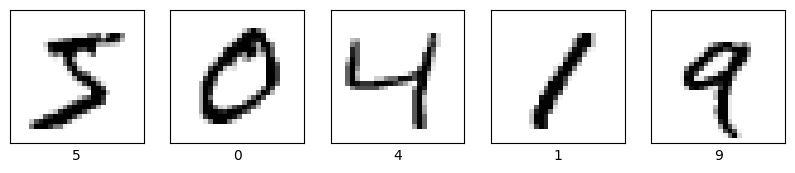

In [7]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [8]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

2023-06-23 13:52:18.452419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-23 13:52:18.456059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-23 13:52:18.459461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [9]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2023-06-23 13:52:22.910726: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-06-23 13:52:23.866986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-23 13:52:24.619519: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f2bcbabbb20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-23 13:52:24.619541: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-06-23 13:52:24.619546: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-06-23 13:52:24.619551: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
202

1875/1875 [==============================] - 9s 3ms/step - loss: 0.1966 - accuracy: 0.9415
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9863


In [11]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step - loss: 0.0326 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


In [12]:
#%pip install keras2onnx
%pip install tf2onnx

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tf2onnx
import onnx

#input_signature = [tf.TensorSpec([None, 28, 28], tf.float32)]

onnx_model, _ = tf2onnx.convert.from_keras(model)

# Save the ONNX model to a file
onnx.save_model(onnx_model, 'model.onnx')


2023-06-23 13:52:54.983560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-23 13:52:54.984882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-23 13:52:54.986015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
%pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.


In [15]:
import onnxruntime as rt
import numpy as np

# Load the ONNX model
sess = rt.InferenceSession('model.onnx')

# Get the input name
input_name = sess.get_inputs()[0].name

# Prepare some input data
x = np.random.rand(1, 28, 28)
x = x.reshape([1, 28, 28, 1])
x = x.astype(np.float32)
# Run the model and get the output

output = sess.run(None, {input_name: x})[0]

# Print the output
print(output)


[[5.0775536e-05 1.6352321e-06 1.9298526e-02 2.8252907e-04 8.3720450e-05
  7.0661234e-05 1.2194946e-04 1.0365062e-05 9.8004490e-01 3.4919554e-05]]


In [16]:
maximum = output[0].max
for i in range(len(output)):
    if output[0][i] == maximum:
        print(i + 1)

In [17]:
outputnew = list(output[0])
print(outputnew.index(max(outputnew)))

8
